In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
df = pd.read_csv("/content/SMEV_dataset.csv")

In [55]:
df.columns

Index(['vehicle_type', 'Year', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Total'],
      dtype='object')

In [56]:
df.head()

,vehicle_type,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
0,Two_Wheeler_EV,2018,96,91,137,116,99,109,160,214,189,176,156,462,2005
1,Two_Wheeler_EV,2019,486,681,955,1281,1570,2258,2560,3311,3171,2745,3121,5868,28007
2,Two_Wheeler_EV,2020,3079,1668,1758,1568,1507,1558,2136,3147,2235,2942,2353,2883,26834
3,Two_Wheeler_EV,2021,85,558,1511,1488,2115,3089,2953,4188,4948,5319,6579,11970,44803
4,Two_Wheeler_EV,2022,5636,1315,4751,14692,16099,17959,20704,24503,26862,30041,35759,54320,252641


Q1. What type of EV Vehicle company will produce more?

In [57]:
ev_sales_df = df.groupby('vehicle_type')['Total'].sum().reset_index()
ev_sales_df

,vehicle_type,Total
0,Bus_EV,7763
1,Four_Wheeler_EV,167173
2,Three_Wheeler_EV,1648860
3,Two_Wheeler_EV,2026470


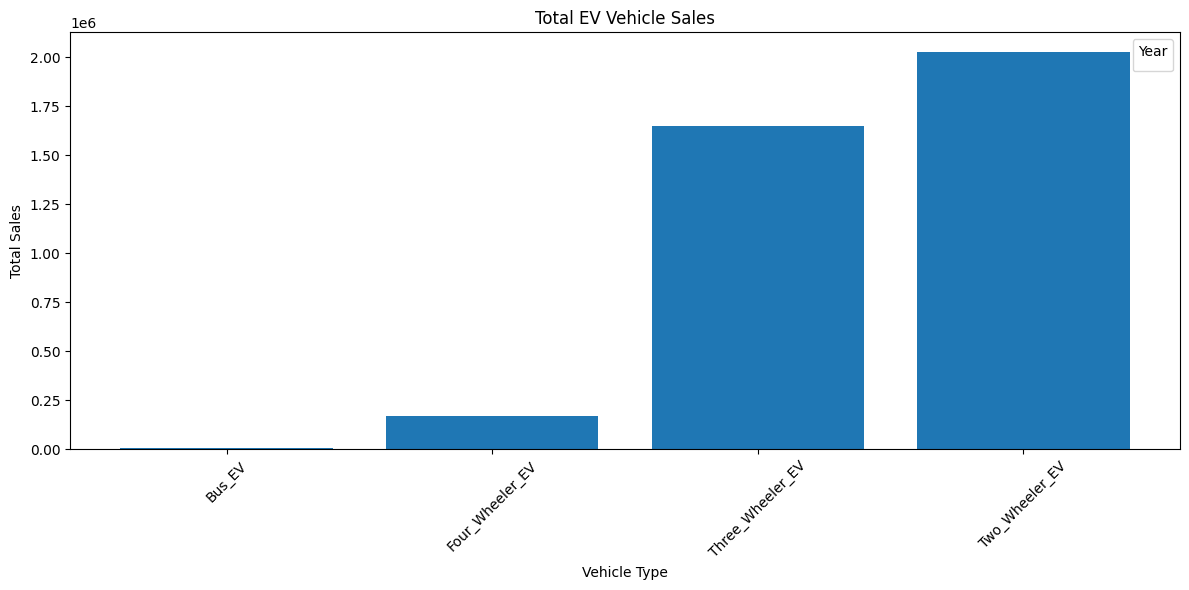

In [58]:
plt.figure(figsize=(12, 6))
plt.bar(ev_sales_df['vehicle_type'], ev_sales_df['Total'])
plt.title('Total EV Vehicle Sales')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Answer :** From the above graph, we can conclude the answer for the question to be **Two_Wheeler_EV**

Q2. Which EV Vehicle type will sell more in future?

In [59]:
annual_sales = df.groupby(['Year', 'vehicle_type'])['Total'].sum().reset_index()
annual_sales['Year'] = pd.to_datetime(annual_sales['Year'], format='%Y')
annual_sales.set_index('Year', inplace=True)

In [60]:
forecast_results = {}

for vehicle_type in annual_sales['vehicle_type'].unique():
    subset = annual_sales[annual_sales['vehicle_type'] == vehicle_type]['Total']
    model = SARIMAX(subset, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    forecast = model_fit.get_forecast(steps=12)
    forecast_results[vehicle_type] = forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/us

Forecast for Bus_EV:
2025-01-01    3693.000000
2026-01-01    3693.000000
2027-01-01    3693.000000
2028-01-01    3693.000000
2029-01-01    3693.000000
2030-01-01    3702.500005
2031-01-01    3749.500005
2032-01-01    4117.500005
2033-01-01    4056.500005
2034-01-01    4877.500005
2035-01-01    5667.500005
2036-01-01    7376.500005
Freq: AS-JAN, Name: predicted_mean, dtype: float64


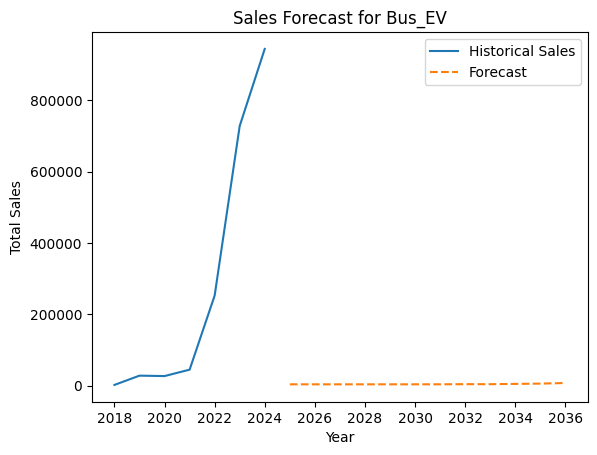

Forecast for Four_Wheeler_EV:
2025-01-01     90432.000000
2026-01-01     90432.000000
2027-01-01     90432.000000
2028-01-01     90432.000000
2029-01-01     90432.000000
2030-01-01     91034.000301
2031-01-01     91715.000301
2032-01-01     92207.000301
2033-01-01     94984.000301
2034-01-01    108452.000301
2035-01-01    137329.000301
2036-01-01    180262.000301
Freq: AS-JAN, Name: predicted_mean, dtype: float64


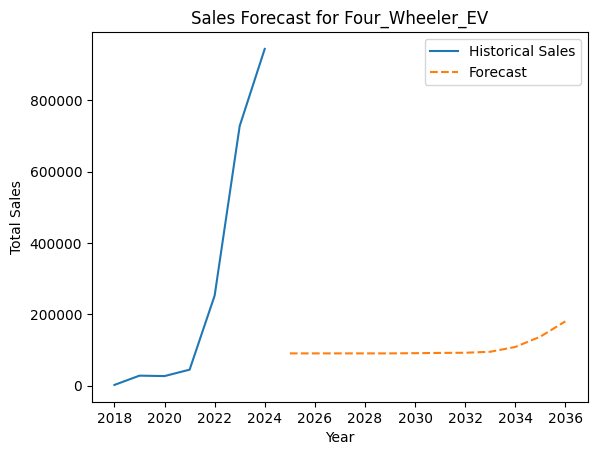

Forecast for Three_Wheeler_EV:
2025-01-01    6.324850e+05
2026-01-01    6.324850e+05
2027-01-01    6.324850e+05
2028-01-01    6.324850e+05
2029-01-01    6.324850e+05
2030-01-01    6.784700e+05
2031-01-01    7.025310e+05
2032-01-01    7.295510e+05
2033-01-01    6.773980e+05
2034-01-01    7.590430e+05
2035-01-01    9.883820e+05
2036-01-01    1.218985e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64


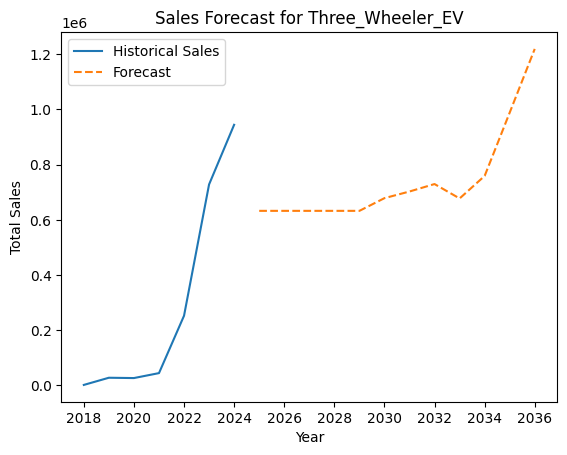

Forecast for Two_Wheeler_EV:
2025-01-01    9.441260e+05
2026-01-01    9.441260e+05
2027-01-01    9.441260e+05
2028-01-01    9.441260e+05
2029-01-01    9.441260e+05
2030-01-01    9.451285e+05
2031-01-01    9.711305e+05
2032-01-01    9.699575e+05
2033-01-01    9.879265e+05
2034-01-01    1.195765e+06
2035-01-01    1.671178e+06
2036-01-01    1.887250e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64


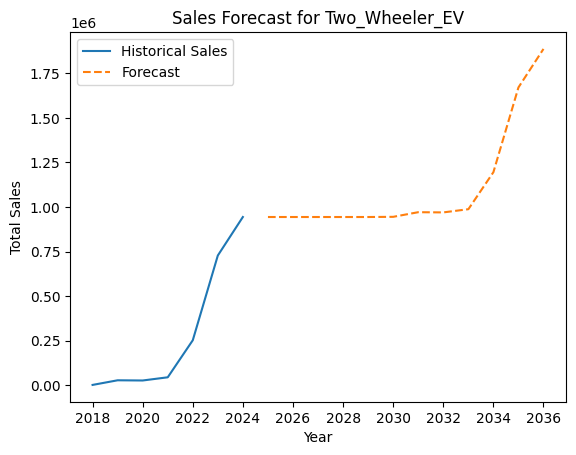

In [61]:
for vehicle_type, forecast in forecast_results.items():
    print(f"Forecast for {vehicle_type}:")
    print(forecast.predicted_mean)

    plt.figure()
    plt.plot(subset, label='Historical Sales')
    plt.plot(forecast.predicted_mean, label='Forecast', linestyle='--')
    plt.title(f'Sales Forecast for {vehicle_type}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()

**Answer :** From the above graphs, we can conclude the answer to the question is **Two_Wheeler_EV**

Q3. Which month has highest sales and from which vehicle?

In [62]:
df_new = df[['vehicle_type', 'Year', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']]
df_melted = df_new.melt(id_vars=['vehicle_type', 'Year'], var_name='Month', value_name='Sales')
monthly_means = df_melted.groupby(['vehicle_type', 'Month'])['Sales'].mean().reset_index()
monthly_means

,vehicle_type,Month,Sales
0,Bus_EV,Apr,61.142857
1,Bus_EV,Aug,93.714286
2,Bus_EV,Dec,145.857143
3,Bus_EV,Feb,119.857143
4,Bus_EV,Jan,124.142857
5,Bus_EV,Jul,62.142857
6,Bus_EV,Jun,64.428571
7,Bus_EV,Mar,108.571429
8,Bus_EV,May,81.571429
9,Bus_EV,Nov,71.571429


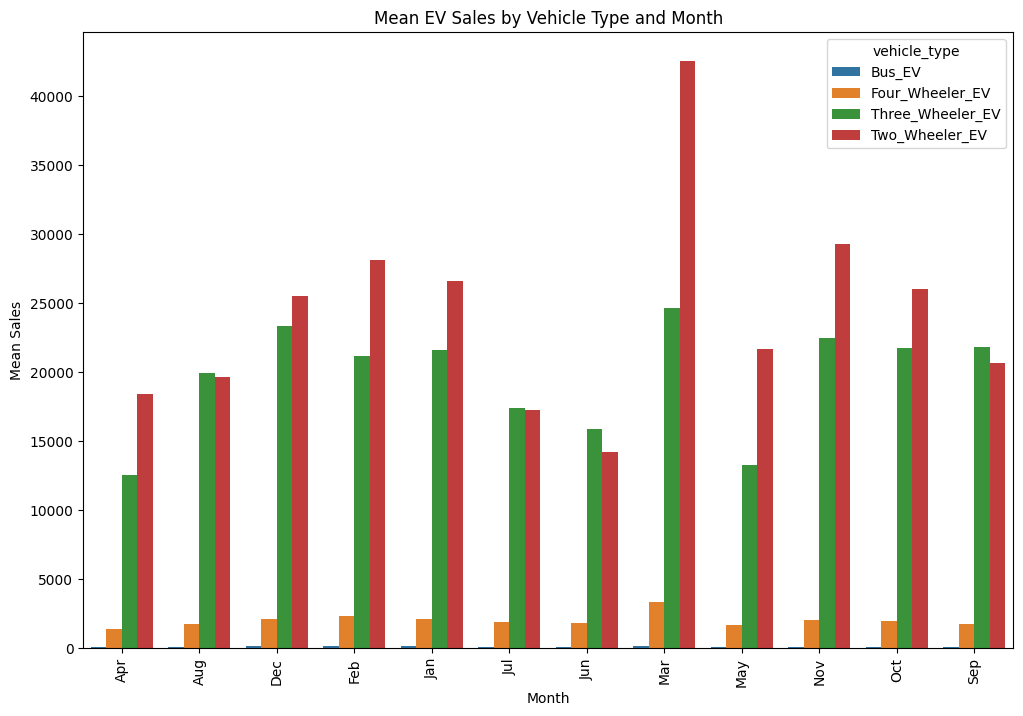

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Month', y='Sales', hue='vehicle_type', data=monthly_means, ax=ax)
ax.set_title('Mean EV Sales by Vehicle Type and Month')
ax.set_xlabel('Month')
ax.set_ylabel('Mean Sales')
plt.xticks(rotation=90)
plt.show()

**Answer :** From the above graph we can conclude that **March** month has the highest sales and those are from **Two_Wheeler_EV**

Q4. In which years did India see the highest growth in EV vehicles sales?

In [64]:
annual_means = df.groupby('Year')['Total'].mean().reset_index()
annual_diffs = annual_means['Total'].diff().fillna(0)

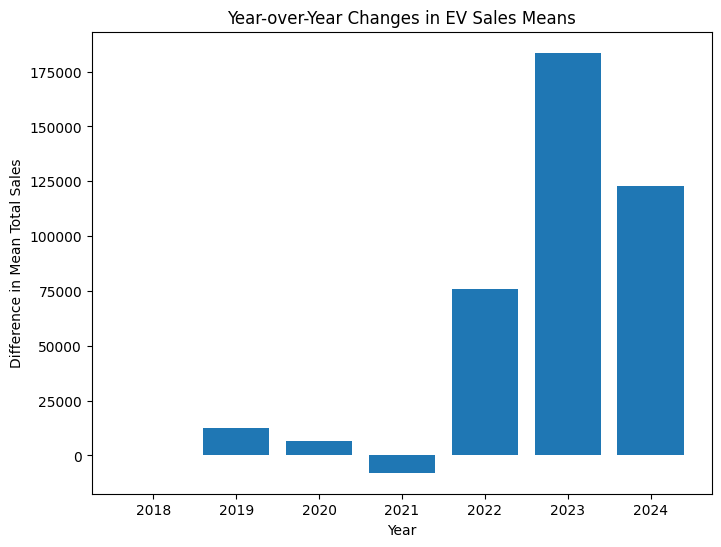

In [65]:
plt.figure(figsize=(8, 6))
plt.bar(annual_means['Year'], annual_diffs)
plt.xlabel('Year')
plt.ylabel('Difference in Mean Total Sales')
plt.title('Year-over-Year Changes in EV Sales Means')
plt.show()

**Answer :** From the above graph we can conclude that in the years **2022-2023** India saw the highest growth in EV vehicles sales